# Inference: Slice Sampling with Stepout
This example shows you how to perform Bayesian inference on a Gaussian distribution and a time-series problem, using
Slice Sampling with Stepout.

First, we create a simple normal distribution.

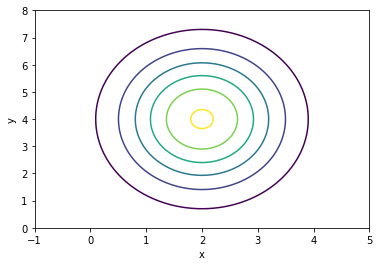

In [2]:
import os
os.chdir("../")
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.GaussianLogPDF([2, 4], [[1, 0], [0, 3]])

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-1, 5, num_points)
y = np.linspace(-0, 8, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now we set up and run a sampling routine using Slice Sampling with Stepout.

In [7]:
# Choose starting point for 3 mcmc chains
x0 = [
    [2, 4]
]

# Create mcmc routine
mcmc = pints.MCMCController(log_pdf, 1, x0, method=pints.SliceStepoutMCMC)

# Add stopping criterion
mcmc.set_max_iterations(10000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(1000)

for sampler in mcmc.samplers():
    sampler.set_w([0.1, 0.1])
    sampler.set_m(100)
    
# Run!
print('Running...')
chain1 = mcmc.run()
chain2 = mcmc.run()
chain3 = mcmc.run()
print('Done!')

Running...
Using Slice Sampling - Stepout
Generating 1 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     1       0:00.0
1     119     0:00.0
2     173     0:00.0
3     250     0:00.0
1000  75779   0:02.2
2000  152467   0:04.4
3000  230437   0:06.5
4000  306645   0:08.6
5000  383138   0:10.7
6000  460148   0:13.0
7000  538263   0:15.3
8000  615918   0:17.5
9000  693745   0:19.7
10000 770398   0:22.0
Halting: Maximum number of iterations (10000) reached.
Using Slice Sampling - Stepout
Generating 1 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     57      0:00.0
1     119     0:00.0
2     167     0:00.0
3     261     0:00.0
1000  76993   0:02.3
2000  154096   0:04.6
3000  230038   0:06.8
4000  305237   0:09.0
5000  381169   0:11.3
6000  457139   0:13.4
7000  532448   0:15.4
8000  611184   0:17.8
9000  689321   0:20.2
10000 766386   0:22.6
Halting: Maximum number of iterations (10000) reached.
Using Slice Sampling - Stepout
Generating 1 chains.
Running in sequenti

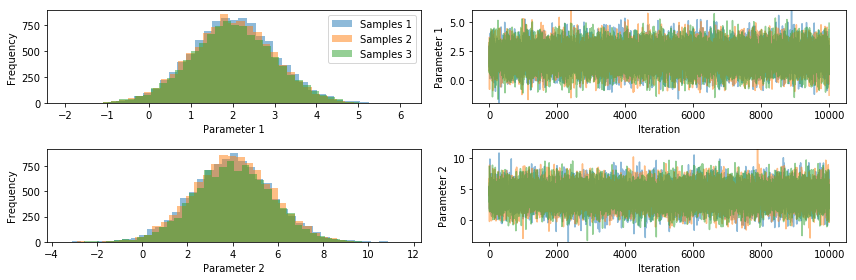

In [8]:
# Show traces and histograms
import pints.plot

chains = np.concatenate((chain1, chain2, chain3))
pints.plot.trace(chains)
plt.show()

R-hat:
[1.0001143919421067, 1.00005174068506]
0.00098200720151298
0.00045406395018932066
0.0002549752239517922


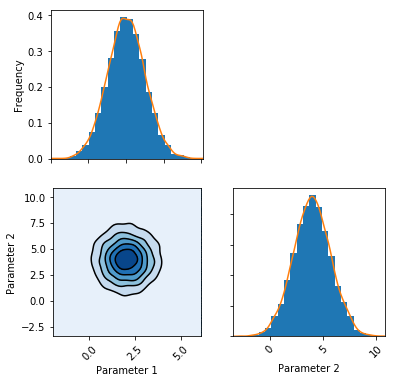

In [9]:
# Discard warm up
chains = chains[:, 200:]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Check Kullback-Leibler divergence of chains
print(log_pdf.kl_divergence(chains[0]))
print(log_pdf.kl_divergence(chains[1]))
print(log_pdf.kl_divergence(chains[2]))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)
plt.show()

# Slice Sampling with Stepout on a time-series problem
We now try the same method on a time-series problem

In [16]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise * 0.1],
    [0.02, 600, noise * 100],
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
num_chains = 1
xs = [real_parameters * (1 + 0.1 * np.random.rand())]

# Create mcmc routine
mcmc = pints.MCMCController(
    log_posterior, num_chains, xs, method=pints.SliceStepoutMCMC)
    
# Add stopping criterion
mcmc.set_max_iterations(10000)

# Set up modest logging
mcmc.set_log_to_screen(True)
mcmc.set_log_interval(1000)

# Run!
print('Running...')
chain1 = mcmc.run()
chain2 = mcmc.run()
chain3 = mcmc.run()
print('Done!')

Running...
Using Slice Sampling - Stepout
Generating 1 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     1       0:00.0
1     45      0:00.0
2     76      0:00.0
3     105     0:00.0
1000  30765   0:01.7
2000  61495   0:03.6
3000  92441   0:05.4
4000  123161   0:07.4
5000  154132   0:09.3
6000  185107   0:11.2
7000  216132   0:13.2
8000  247160   0:15.0
9000  278051   0:16.8
10000 308711   0:18.6
Halting: Maximum number of iterations (10000) reached.
Using Slice Sampling - Stepout
Generating 1 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     26      0:00.0
1     56      0:00.0
2     90      0:00.0
3     126     0:00.0
1000  30912   0:01.9
2000  61598   0:03.6
3000  92398   0:05.5
4000  123132   0:07.4
5000  154039   0:09.2
6000  184681   0:11.2
7000  215344   0:13.0
8000  246148   0:14.9
9000  277141   0:16.8
10000 307742   0:18.8
Halting: Maximum number of iterations (10000) reached.
Using Slice Sampling - Stepout
Generating 1 chains.
Running in sequential m

R-hat:
[0.9999618904689009, 0.9999780110780673, 0.9999838507507927]


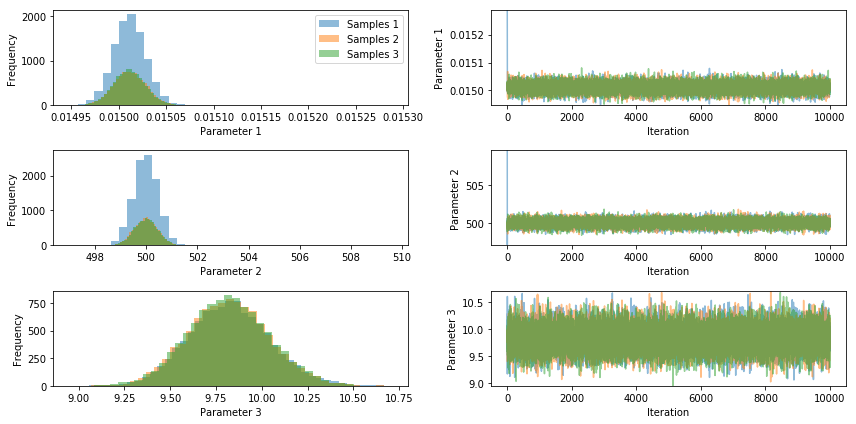

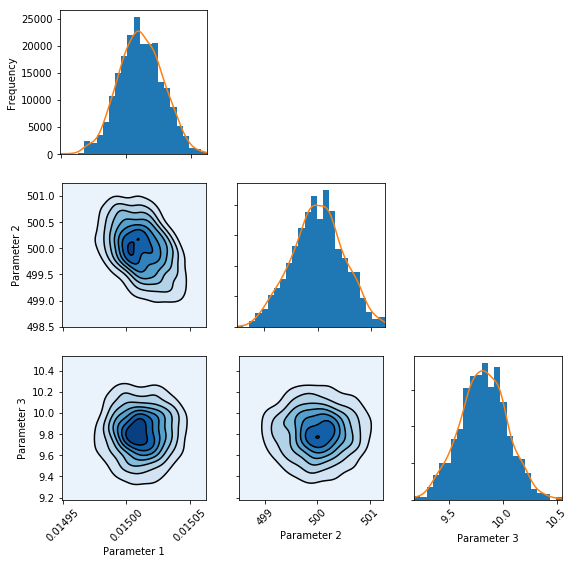

In [17]:
chains = np.concatenate((chain1, chain2, chain3))

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 500:, :]

# Apply thinning
chains = chains[:, ::10]

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()